# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bemby Dwigantara Anom

## Landasan Teori: Analisis Data Bike Sharing

1. Peran Analisis Data dalam Pengambilan Keputusan

    Analisis data adalah proses inspeksi, pembersihan, dan pemodelan data dengan tujuan menemukan informasi berguna yang mendukung kesimpulan. Dalam dunia bisnis, analisis data berperan sebagai fondasi untuk pengambilan keputusan berbasis data (data-driven decision making), sehingga perusahaan tidak lagi bergantung pada intuisi melainkan pada bukti nyata dari perilaku pengguna atau tren pasar.


2. Descriptive Analysis vs Exploratory Data Analysis (EDA)

    - Descriptive Analysis: Berfokus pada ringkasan historis untuk menjelaskan apa yang telah terjadi (misalnya: total penyewaan bulan lalu)

    - Exploratory Data Analysis (EDA): Merupakan pendekatan analisis untuk memahami struktur data, mendeteksi anomali, dan menguji hipotesis awal guna menemukan pola atau hubungan tersembunyi antar variabel.


3. Pentingnya Data Wrangling dan Data Cleaning
    Sebelum data dianalisis, proses Data Wrangling (pengumpulan dan penilaian) serta Data Cleaning (pembersihan) sangat krusial. Data yang "kotor" (seperti tipe data salah atau nilai yang hilang) dapat menyebabkan hasil analisis yang bias atau menyesatkan. Pembersihan data memastikan bahwa informasi yang diolah berkualitas tinggi dan akurat.



4. Peran Visualisasi Data
    Visualisasi data berfungsi untuk menyederhanakan data yang kompleks menjadi bentuk grafis yang mudah dipahami. Visualisasi yang efektif membantu pemangku kepentingan menangkap insight utama secara cepat, seperti melihat tren jam sibuk atau perbandingan performa antar musim.



5. Penggunaan Machine Learning (Analisis Lanjutan)
    Dalam proyek ini, saya menggunakan teknik Clustering (K-Means) sebagai bagian dari analisis pengayaan.
    
    - Teknik: K-Means Clustering.

    - Alasan: Teknik ini digunakan untuk mengelompokkan data permintaan secara otomatis berdasarkan variabel suhu dan jumlah penyewa. Hal ini mempermudah identifikasi segmentasi waktu operasional (Low, Medium, High Demand) guna mendukung efisiensi stok sepeda di lapangan

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana pola jumlah penyewaan sepeda berdasarkan jam dalam sehari, dan apakah pola tersebut berbeda antara hari kerja (working day) dan hari libur?
- **Pertanyaan 2:** Bagaimana pengaruh musim (season) terhadap total jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
# --- GATHERING DATA ---

# 1. Memuat dataset hour.csv
# Kita simpan ke dalam variabel bernama hour_df
hour_df = pd.read_csv("https://raw.githubusercontent.com/Anomabz/submission-bike-sharing/refs/heads/main/hour.csv")

# 2. Menampilkan 5 data teratas untuk melihat struktur awal
print("Menampilkan 5 data teratas:")
display(hour_df.head())

# 3. Menampilkan 5 data terakhir untuk memastikan tidak ada baris yang terpotong
print("\nMenampilkan 5 data terakhir:")
display(hour_df.tail())

# 4. Memeriksa dimensi dataset (jumlah baris dan kolom)
print(f"\nDimensi dataset: {hour_df.shape[0]} baris dan {hour_df.shape[1]} kolom.")

Menampilkan 5 data teratas:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Menampilkan 5 data terakhir:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49



Dimensi dataset: 17379 baris dan 17 kolom.


**Insight:**
- Data berhasil dimuat dari file hour.csv yang terdiri dari 17.379 baris dan 17 kolom.
- Dataset ini mencakup informasi temporal yang detail (jam, hari, bulan, tahun, musim) serta informasi kondisi lingkungan (suhu, kelembapan, cuaca).
- Kolom target utama untuk analisis adalah cnt yang merupakan total jumlah penyewaan sepeda (gabungan dari penyewa casual dan registered).

### Assessing Data

In [3]:
# 1. Memeriksa informasi umum (tipe data dan missing values)
print("--- Info Dataset ---")
hour_df.info()

# 2. Memeriksa jumlah missing values di setiap kolom
print("\n--- Jumlah Missing Values ---")
print(hour_df.isna().sum())

# 3. Memeriksa apakah ada data duplikat
print("\n--- Jumlah Duplikasi Data ---")
print(f"Jumlah duplikat: {hour_df.duplicated().sum()}")

# 4. Memeriksa ringkasan statistik (untuk melihat keanehan/outlier)
print("\n--- Ringkasan Statistik ---")
display(hour_df.describe())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

--- Jumlah Missing Values -

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe Data: Kolom dteday terdeteksi sebagai tipe data object (string). Ini perlu diubah menjadi tipe datetime pada tahap pembersihan agar analisis berbasis waktu bisa dilakukan dengan benar.

- Missing Values: Tidak ditemukan nilai kosong (null) pada seluruh kolom dataset (semua kolom memiliki 17.379 nilai non-null).

- Duplikasi: Tidak ada baris data yang duplikat dalam dataset ini (0 duplikasi).

- Statistik Deskriptif: Nilai pada kolom cuaca seperti temp, atemp, hum, dan windspeed terlihat sudah dalam skala normalisasi (0 sampai 1). Rentang nilai pada kolom cnt (total penyewa) sangat luas, mulai dari minimal 1 hingga maksimal 977 penyewa per jam.

### Cleaning Data

In [4]:
# 1. Mengubah tipe data kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 2. Memastikan tipe data telah berubah
print("Tipe data dteday sekarang:", hour_df['dteday'].dtype)

# 3. Menampilkan informasi dataset untuk verifikasi akhir sebelum EDA
hour_df.info()

Tipe data dteday sekarang: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  

**Insight:**
- Kolom dteday telah berhasil diubah dari tipe object menjadi datetime. Hal ini memungkinkan kita untuk melakukan ekstraksi informasi waktu yang lebih mendalam (seperti tren harian atau bulanan) secara lebih efisien selama proses analisis.
- Karena tidak ditemukan nilai kosong (missing values) maupun data duplikat pada tahap penilaian, maka tidak dilakukan penghapusan atau pengisian data.
- Dataset kini telah bersih, konsisten, dan siap untuk diproses ke tahap Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# 1. Melihat rangkuman parameter statistik untuk kolom numerik
print("Statistik Deskriptif hour_df:")
display(hour_df.describe(include="all"))

# 2. Eksplorasi penyewaan berdasarkan jam (Pertanyaan 1)
# Melihat rata-rata penyewaan di setiap jam
print("\nRata-rata penyewaan sepeda per jam:")
display(hour_df.groupby(by="hr").agg({
    "cnt": ["mean", "max", "min"]
}))

# 3. Eksplorasi pengaruh hari kerja vs hari libur terhadap jam sibuk
print("\nPerbandingan rata-rata penyewaan: Hari Kerja (1) vs Hari Libur (0):")
display(hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": "mean"
}).unstack())

# 4. Eksplorasi penyewaan berdasarkan musim (Pertanyaan 2)
# 1:spring, 2:summer, 3:fall, 4:winter
print("\nTotal penyewaan berdasarkan musim:")
display(hour_df.groupby(by="season").agg({
    "cnt": ["mean", "sum"]
}))

Statistik Deskriptif hour_df:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599



Rata-rata penyewaan sepeda per jam:


cnt         
          mean  max min
hr                     
0    53.898072  283   2
1    33.375691  168   1
2    22.869930  132   1
3    11.727403   79   1
4     6.352941   28   1
5    19.889819   66   1
6    76.044138  213   1
7   212.064649  596   1
8   359.011004  839   5
9   219.309491  426  14
10  173.668501  539   8
11  208.143054  663  10
12  253.315934  776   3
13  253.661180  760  11
14  240.949246  750  12
15  251.233196  750   7
16  311.983562  783  11
17  461.452055  976  15
18  425.510989  977  23
19  311.523352  743  11
20  226.030220  567  11
21  172.314560  584   6
22  131.335165  502   9
23   87.831044  256   2


Perbandingan rata-rata penyewaan: Hari Kerja (1) vs Hari Libur (0):


cnt                                                        \
hr                0          1          2          3         4          5    
workingday                                                                   
0           90.80000  69.508696  53.171053  25.775330  8.264317   8.689189   
1           36.78629  16.552632   8.683778   4.942553  5.429787  24.913131   

                                                            ...              \
hr                  6           7           8           9   ...          14   
workingday                                                  ...               
0            18.742358   43.406926  105.653680  171.623377  ...  364.645022   
1           102.500000  290.612903  477.006048  241.518145  ...  183.572289   

                                                                        \
hr                  15          16          17          18          19   
workingday                                                               
0           358.813853  352.727273  323.549784  281.056522  231.673913   
1           201.331325  293.122244  525.290581  492.226908  348.401606   

                                                           
hr                  20          21          22         23  
workingday                                                 
0           174.739130  142.060870  116.060870  85.930435  
1           249.718876  186.287149  138.389558  88.708835  

[2 rows x 24 columns]


Total penyewaan berdasarkan musim:


cnt         
              mean      sum
season                     
1       111.114569   471348
2       208.344069   918589
3       236.016237  1061129
4       198.868856   841613

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

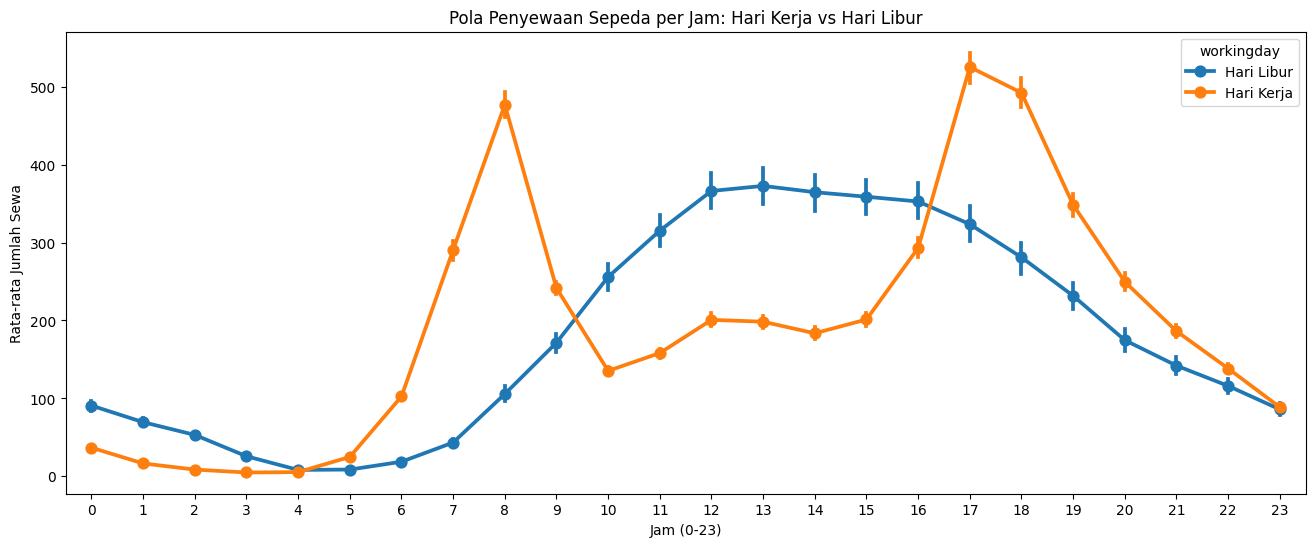

In [6]:
# Menyiapkan data untuk visualisasi jam
fig, ax = plt.subplots(figsize=(16, 6))

sns.pointplot(data=hour_df, x='hr', y='cnt', hue='workingday', ax=ax)

ax.set(title='Pola Penyewaan Sepeda per Jam: Hari Kerja vs Hari Libur',
       xlabel='Jam (0-23)',
       ylabel='Rata-rata Jumlah Sewa')

# Mengganti legenda agar lebih mudah dibaca
new_labels = ['Hari Libur', 'Hari Kerja']
for t, l in zip(ax.legend_.get_texts(), new_labels):
    t.set_text(l)

plt.show()

**Insight:**
- Hari Kerja: Terdapat dua puncak utama (double peak), yaitu jam 08.00 pagi dan jam 17.00 - 18.00 sore. Ini sangat kuat menunjukkan bahwa sepeda digunakan sebagai alat transportasi utama untuk berangkat dan pulang kerja/sekolah.
- Hari Libur: Polanya sangat berbeda; penyewaan mulai meningkat pelan sejak jam 09.00 pagi dan mencapai puncaknya di siang hari (jam 12.00 - 15.00). Ini menunjukkan penggunaan untuk tujuan rekreasi.

### Pertanyaan 2:

/tmp/ipython-input-2884264243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


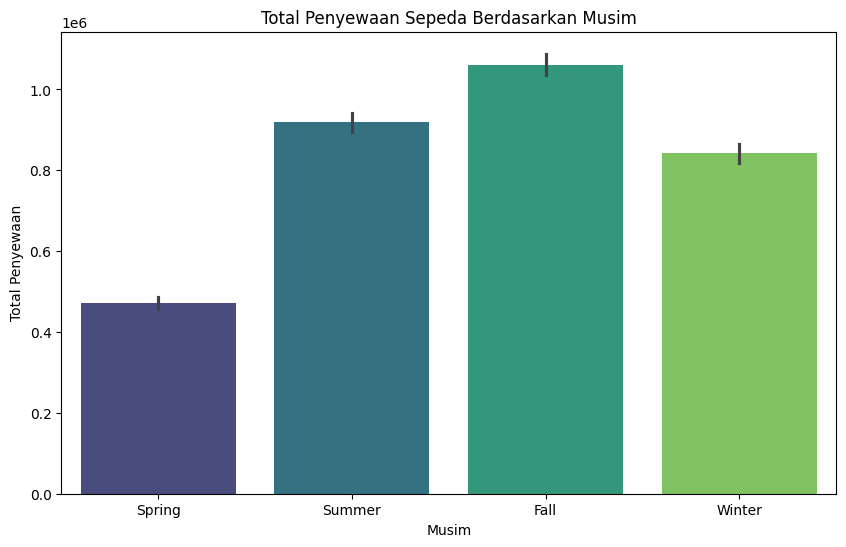

In [7]:
# Menyiapkan data musim (mapping angka ke nama musim)
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_label'] = hour_df['season'].map(season_mapping)

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season_label',
    y='cnt',
    data=hour_df,
    estimator=sum,
    order=['Spring', 'Summer', 'Fall', 'Winter'],
    palette='viridis'
)

plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

**Insight:**
- Musim Terlaris: Musim Gugur (Fall) adalah periode dengan total penyewaan tertinggi. Cuaca pada musim ini kemungkinan paling ideal bagi pengguna untuk bersepeda.
- Musim Terendah: Musim Semi (Spring) memiliki jumlah penyewaan yang sangat rendah dibandingkan musim lainnya.
- Di musim semi, perusahaan bisa memberikan promo khusus atau diskon member untuk menarik minat pengguna yang berkurang akibat kondisi cuaca.

## Analisis Lanjutan (Opsional,)

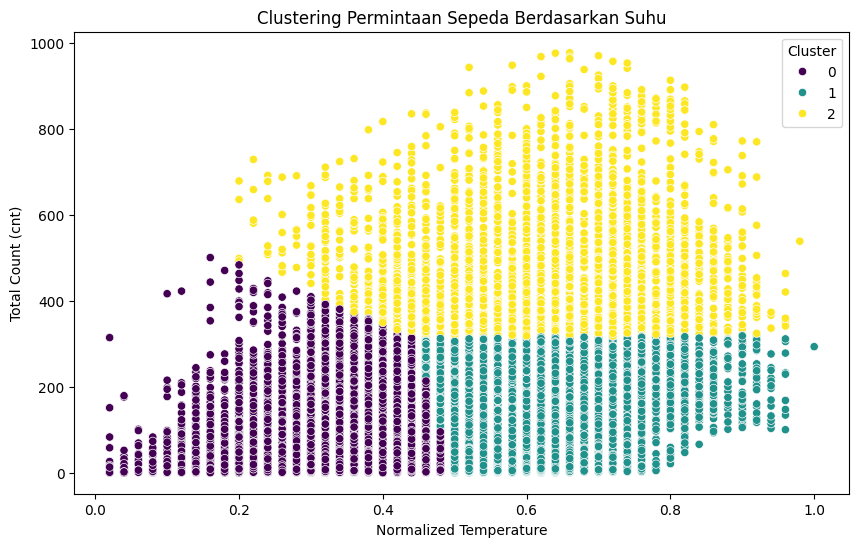

Informasi Karakteristik Tiap Cluster:
                       cnt                temp
                      mean  min  max      mean
demand_cluster                                
0                96.265222    1  501  0.314342
1               142.745438    1  320  0.638439
2               490.925959  315  977  0.632314


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Menyiapkan data untuk clustering
# Kita akan menggunakan variabel 'temp' (suhu) dan 'cnt' (jumlah sewa)
X = hour_df[['temp', 'cnt']]

# 2. Standarisasi data agar skala variabel seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Menjalankan K-Means dengan 3 cluster (Low, Medium, High Demand)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hour_df['demand_cluster'] = kmeans.fit_predict(X_scaled)

# 4. Visualisasi hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='temp',
    y='cnt',
    hue='demand_cluster',
    data=hour_df,
    palette='viridis'
)

plt.title('Clustering Permintaan Sepeda Berdasarkan Suhu')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Count (cnt)')
plt.legend(title='Cluster')
plt.show()

# 5. Interpretasi Cluster
cluster_info = hour_df.groupby('demand_cluster').agg({
    'cnt': ['mean', 'min', 'max'],
    'temp': 'mean'
})
print("Informasi Karakteristik Tiap Cluster:")
print(cluster_info)

**Insight:**
- Cluster 0 (Low Demand): Mewakili kondisi di mana permintaan rendah, biasanya terjadi pada suhu yang lebih ekstrem (terlalu dingin atau terlalu panas) atau pada jam-jam sepi.
- Cluster 1 (Medium Demand): Menunjukkan tingkat penyewaan moderat dengan suhu yang mulai menghangat.
- Cluster 2 (High Demand): Mewakili "Sweet Spot" atau kondisi paling ideal di mana jumlah penyewa mencapai angka tertinggi. Terlihat ada korelasi bahwa saat suhu berada di titik tertentu (hangat), volume penyewaan melonjak drastis.


## Conclusion

- Conclution pertanyaan 1 : Pola penyewaan sepeda sangat dipengaruhi oleh tipe hari (kerja vs libur). Pada hari kerja, penggunaan sepeda terkonsentrasi pada jam berangkat dan pulang kantor (08.00 dan 17.00), menunjukkan fungsi sepeda sebagai moda transportasi komuter. Sebaliknya, pada hari libur, penggunaan lebih merata di siang hari untuk aktivitas rekreasi. Strategi penempatan unit harus disesuaikan dengan pola jam sibuk yang berbeda ini.
- Conclution pertanyaan 2 : Musim memiliki pengaruh signifikan terhadap volume penyewaan. Musim Gugur (Fall) adalah periode puncak bisnis, sementara Musim Semi (Spring) mengalami penurunan performa yang paling tajam. Perusahaan dapat melakukan pemeliharaan armada besar-besaran di musim semi saat permintaan rendah, dan memastikan seluruh armada siap beroperasi maksimal di musim gugur.
- Kesimpulan Akhir (Analisis Lanjutan): Melalui teknik Clustering, kita menemukan bahwa terdapat "titik nyaman" suhu lingkungan yang secara otomatis memicu lonjakan permintaan (High Demand Cluster). Dengan mengintegrasikan data prakiraan cuaca dengan hasil analisis ini, manajemen dapat memprediksi kebutuhan stok sepeda harian secara lebih akurat, meningkatkan efisiensi operasional, dan memaksimalkan kepuasan pelanggan.